<a href="https://colab.research.google.com/github/Simon-Yeast/NeuroDetect/blob/main/Proyecto_Final_NeuroDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NeuroDetect**
##*Simon Eastman Arango*
##*Shara Urrea Ospina*

###Proyecto Final
###12/12/2025

## Descripción de la problemática:
El proyecto tiene como objetivo desarrollar un sistema automatizado de detección de anomalías en imágenes de tejidos humanos utilizando Python. La detección temprana de anomalías en tejidos es fundamental para un diagnóstico preciso y un tratamiento efectivo. Sin embargo, la detección manual de estas anomalías es laboriosa y propensa a errores, lo que destaca la necesidad de un enfoque automatizado para mejorar la eficiencia y precisión en el proceso.





# Código:

Le permitimos a Colab acceder a Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos las librerías necesarias

In [3]:
import os                         #Sistema operativo de pythin para manejar carpetas, caminos, listas dentro de carpetas, etc.
from PIL import Image             #Para editar y organizar fotos
import numpy as np                #Computación numérica
import pandas as pd               #Manejo de tablas
import matplotlib.pyplot as plt   #Visualizar datos
import seaborn as sns             #Crear gráficos

In [4]:
from sklearn.model_selection import train_test_split                  #Función para dividir los datos
from sklearn.metrics import classification_report, confusion_matrix   #Visualizar y analizar resultados
from sklearn.metrics import accuracy_score                            #C'alculo del porcentaje de predicciones correctas

In [5]:
import tensorflow as tf                                                 #Entrenaminto de redes neuranales
from tensorflow.keras.models import Sequential                          #Modelo por capas
from tensorflow.keras.layers import Dense, Dropout, Flatten             #Conversión de imágenes y manejo de redes neuronales
from tensorflow.keras.optimizers import Adamax                          #Optimizador especial para imágenes
from tensorflow.keras.metrics import Precision, Recall                  #Seguimiento del proceso
from tensorflow.keras.preprocessing.image import ImageDataGenerator     #Modificación avanzada de imágenes

import warnings
warnings.filterwarnings('ignore')                                       #Para evitar exceso de advertencias y saturación en la salida

Cargamos los datos

In [6]:
#Para datos de entrenamiento
def train_df(tr_path):      #Crea una tupla con una fila de el nombre de la clase (glioma, notumor, etc.) y el camino a el archivo de la imagen
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})     #Convierte las tuplas a un dataframe
    return tr_df #Guardamos el dataframe en una variable

In [7]:
#Para datos de prueba (se hacen los mismos pasos que antes pero para los datos de prueba)
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [8]:
tr_df = train_df('/content/drive/MyDrive/Campistas G571 - Inteligencia Artificial - IUE/Proyecto NeuroDetect/Dataset/Training')
tr_df
#Ahora aplicamos la estructura de dataframe a todos nuestros datos de entrenamiento

,Class Path,Class
0,/content/drive/MyDrive/Campistas G571 - Inteli...,glioma
1,/content/drive/MyDrive/Campistas G571 - Inteli...,glioma
2,/content/drive/MyDrive/Campistas G571 - Inteli...,glioma
3,/content/drive/MyDrive/Campistas G571 - Inteli...,glioma
4,/content/drive/MyDrive/Campistas G571 - Inteli...,glioma
...,...,...
5707,/content/drive/MyDrive/Campistas G571 - Inteli...,pituitary
5708,/content/drive/MyDrive/Campistas G571 - Inteli...,pituitary
5709,/content/drive/MyDrive/Campistas G571 - Inteli...,pituitary
5710,/content/drive/MyDrive/Campistas G571 - Inteli...,pituitary


In [9]:
ts_df = test_df('/content/drive/MyDrive/Campistas G571 - Inteligencia Artificial - IUE/Proyecto NeuroDetect/Dataset/Testing')
ts_df
#Ahora aplicamos la estructura de dataframe a todos nuestros datos de prueba

,Class Path,Class
0,/content/drive/MyDrive/Campistas G571 - Inteli...,glioma
1,/content/drive/MyDrive/Campistas G571 - Inteli...,glioma
2,/content/drive/MyDrive/Campistas G571 - Inteli...,glioma
3,/content/drive/MyDrive/Campistas G571 - Inteli...,glioma
4,/content/drive/MyDrive/Campistas G571 - Inteli...,glioma
...,...,...
1309,/content/drive/MyDrive/Campistas G571 - Inteli...,pituitary
1310,/content/drive/MyDrive/Campistas G571 - Inteli...,pituitary
1311,/content/drive/MyDrive/Campistas G571 - Inteli...,pituitary
1312,/content/drive/MyDrive/Campistas G571 - Inteli...,pituitary


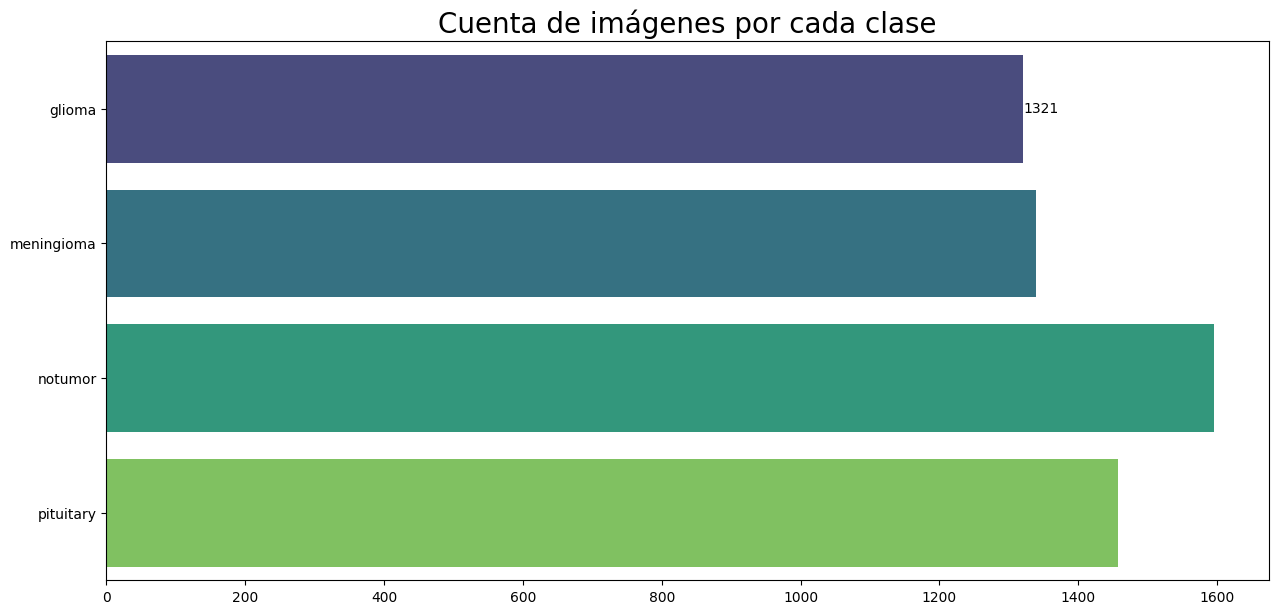

In [10]:
# Contamos los tipos de datos de entrenamiento para probar que se agregaron exitosamente
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'] , palette='viridis')

plt.xlabel('')
plt.ylabel('')
plt.title('Cuenta de imágenes por cada clase', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

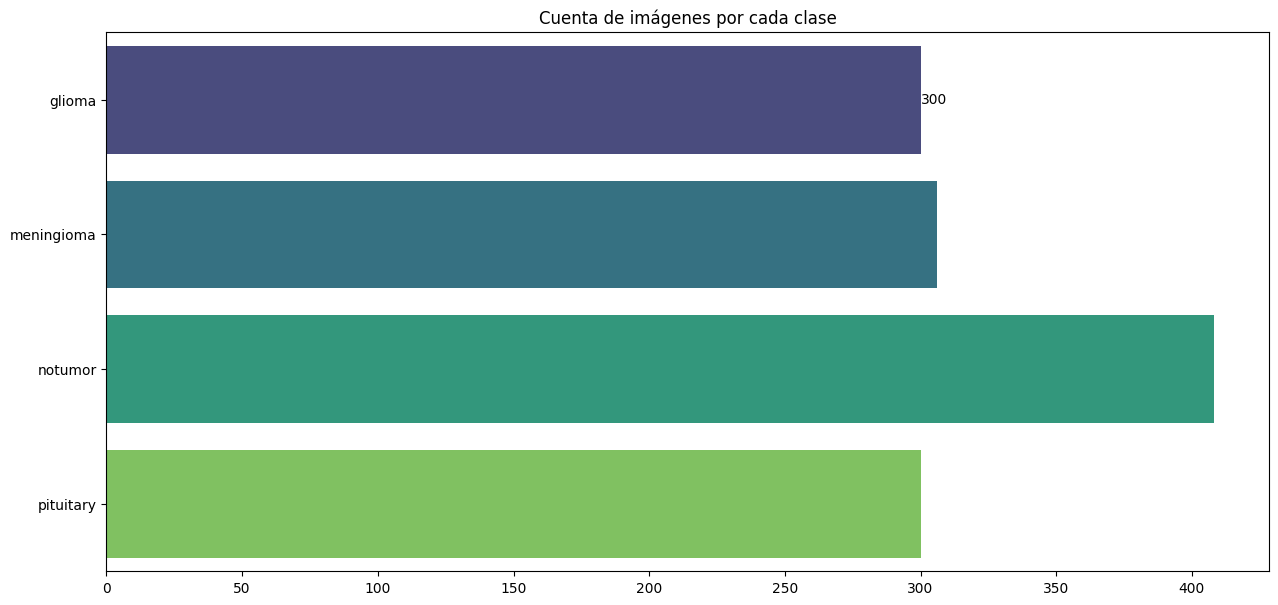

In [11]:
# Contamos los tipos de datos de prueba para probar que se agregaron exitosamente
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Cuenta de imágenes por cada clase')
ax.bar_label(ax.containers[0])

plt.show()

In [12]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=7, stratify=ts_df['Class']) #Stratify es para que el split sea igual por clase
valid_df
#Dividimos los datos de prueba en 2 partes iguales, una de validación y otra de prueba final

,Class Path,Class
244,/content/drive/MyDrive/Campistas G571 - Inteli...,glioma
1057,/content/drive/MyDrive/Campistas G571 - Inteli...,pituitary
524,/content/drive/MyDrive/Campistas G571 - Inteli...,meningioma
409,/content/drive/MyDrive/Campistas G571 - Inteli...,meningioma
128,/content/drive/MyDrive/Campistas G571 - Inteli...,glioma
...,...,...
290,/content/drive/MyDrive/Campistas G571 - Inteli...,glioma
345,/content/drive/MyDrive/Campistas G571 - Inteli...,meningioma
500,/content/drive/MyDrive/Campistas G571 - Inteli...,meningioma
301,/content/drive/MyDrive/Campistas G571 - Inteli...,meningioma


Procesamos las imágenes

In [13]:
batch_size = 32           #Es recomendado analizar de a 32 imágenes al tiempo para que no sea muy lento y para no saturar la GPU
img_size = (299, 299)     #Esto modifica el tamaño de las imágenes a 299x299 pixeles (como en InceptionV3)

_gen = ImageDataGenerator(rescale=1/255 , brightness_range=(0.8, 1.2))      #Esto nos permite tener una mejor claridad y consistencia en las imágenes
ts_gen = ImageDataGenerator(rescale=1/255)      #Las imágenes de prueba no las distorcionamos

tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class', batch_size=batch_size , target_size=img_size)
valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path' , y_col='Class', batch_size=batch_size , target_size=img_size)
ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path' , y_col='Class', batch_size=16 , target_size=img_size, shuffle=False)
#Lee los caminos a las imágenes y las importa en las tandas requeridas para modificar y analizar

Found 5712 validated image filenames belonging to 4 classes.
Found 657 validated image filenames belonging to 4 classes.
Found 657 validated image filenames belonging to 4 classes.


Muestras de los datos cargados

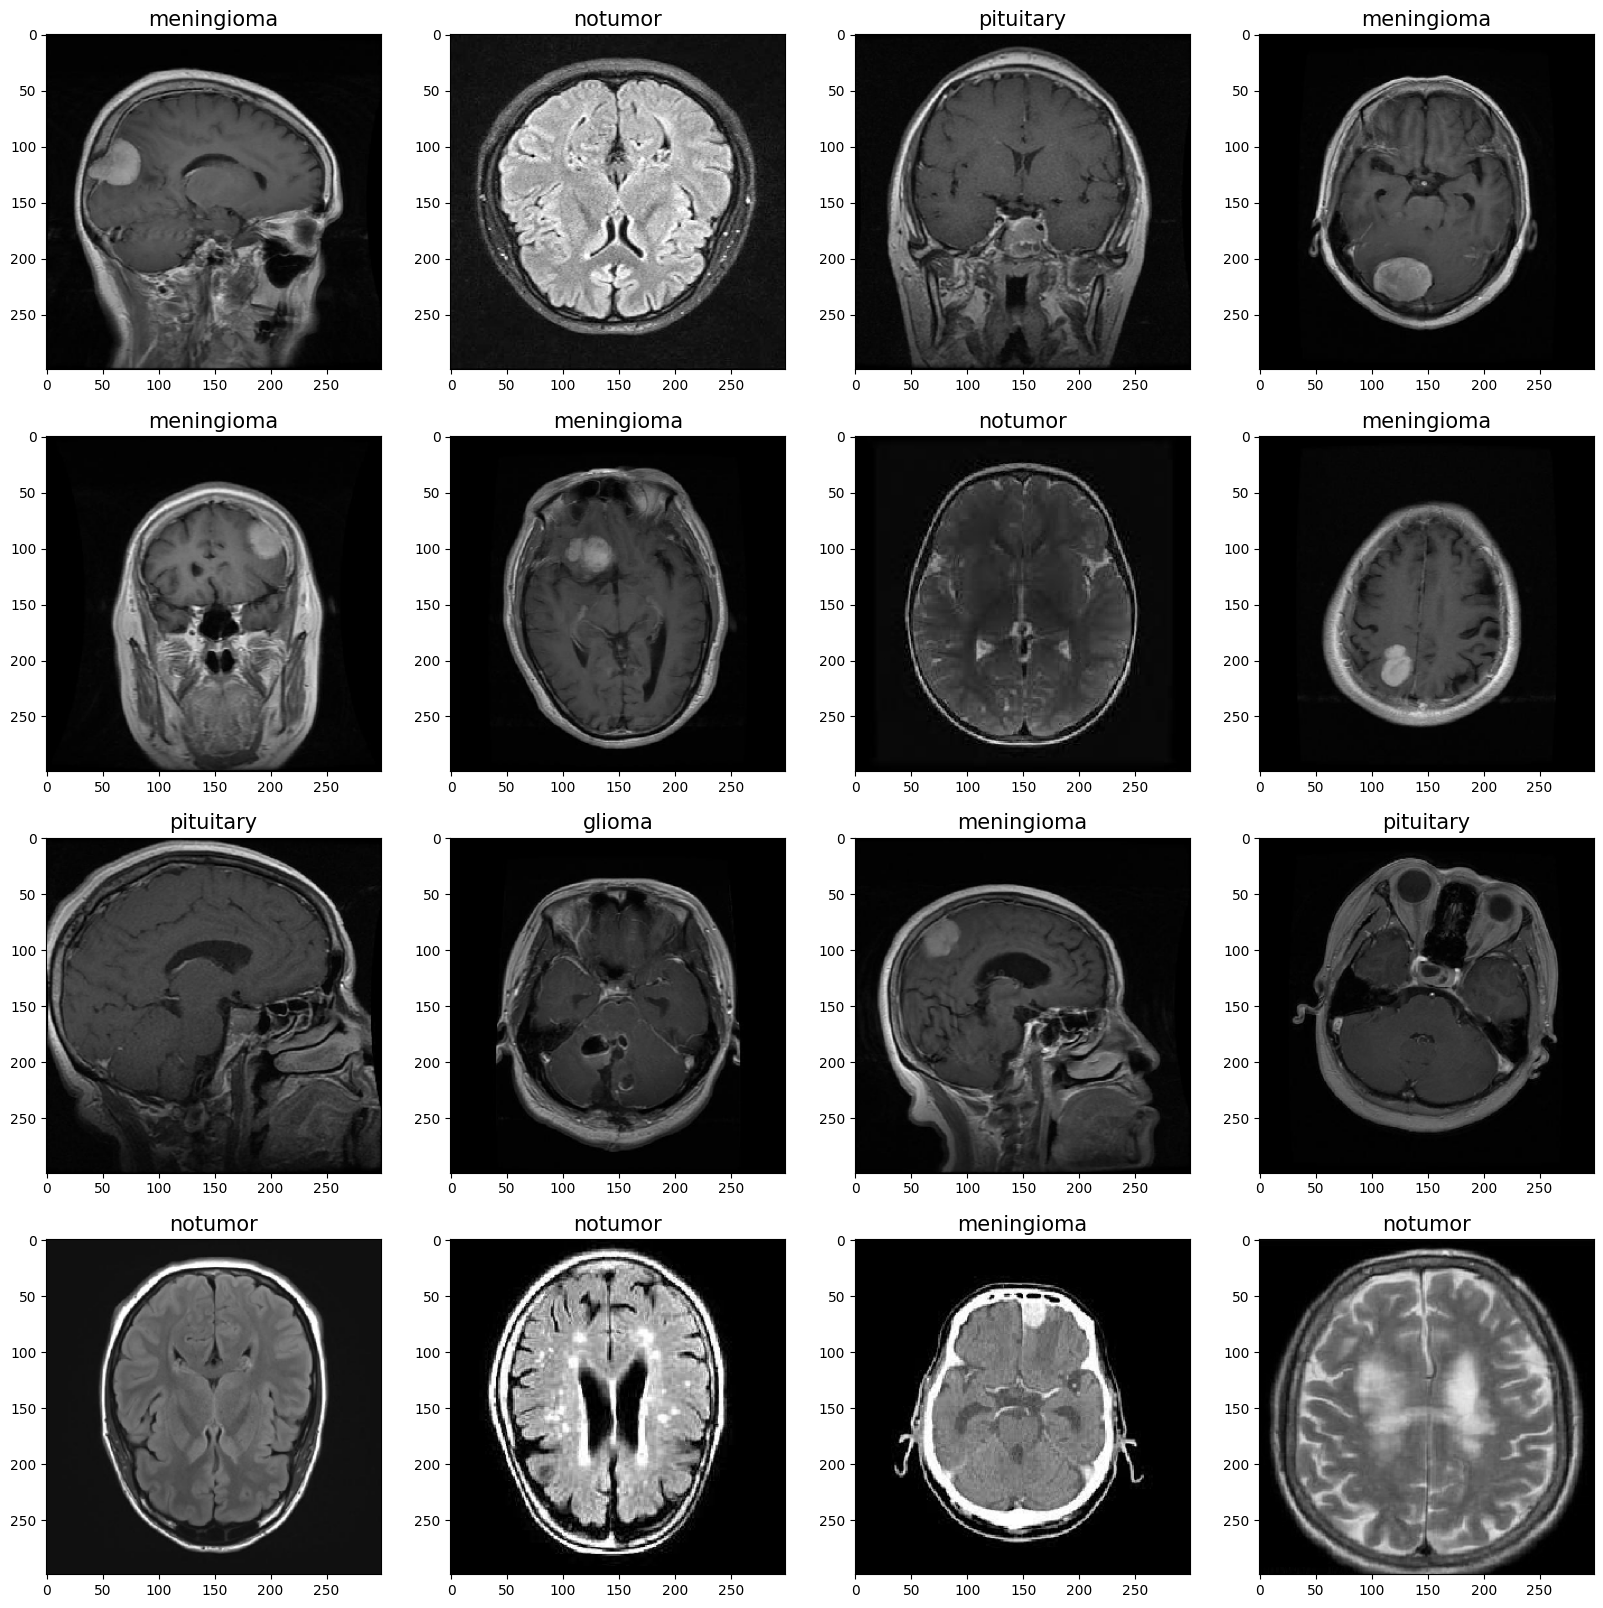

In [14]:
#Visualización de imágenes con su clase
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

Creación del modelo (CNN)

In [15]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False , weights= "imagenet" , input_shape= img_shape, pooling = 'max')

# for layer in base_model.layers:
#     layer.trainable = False

model = Sequential([                     #Modelo de capas
    base_model,                          #Capa1: Cargamos un modelo base Xception (CNN)
    Flatten(),                           #Capa2: Verifica que la salida sea un arreglo de una dimensión
    Dropout(rate= 0.3),                  #Capa3: De forma aleatoria apaga el 30% de neuronas para evitar el "sobreacondicionamiento" de los datos
    Dense(128, activation= 'relu'),      #Capa4: Reconocimiento y aprendizaje de patrones únicos por categoría
    Dropout(rate= 0.25),                 #Capa5: De forma aleatoria apaga el 30% de neuronas para evitar el "sobreacondicionamiento" de los datos
    Dense(4, activation= 'softmax')      #Capa6: Clasificación final (4 por el número d ecategoría y softmax para convertir el resultado en una probabilidad)
])

model.compile(Adamax(learning_rate= 0.001) , loss= 'categorical_crossentropy' , metrics= ['accuracy' , Precision(),Recall()])   #Compilación del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

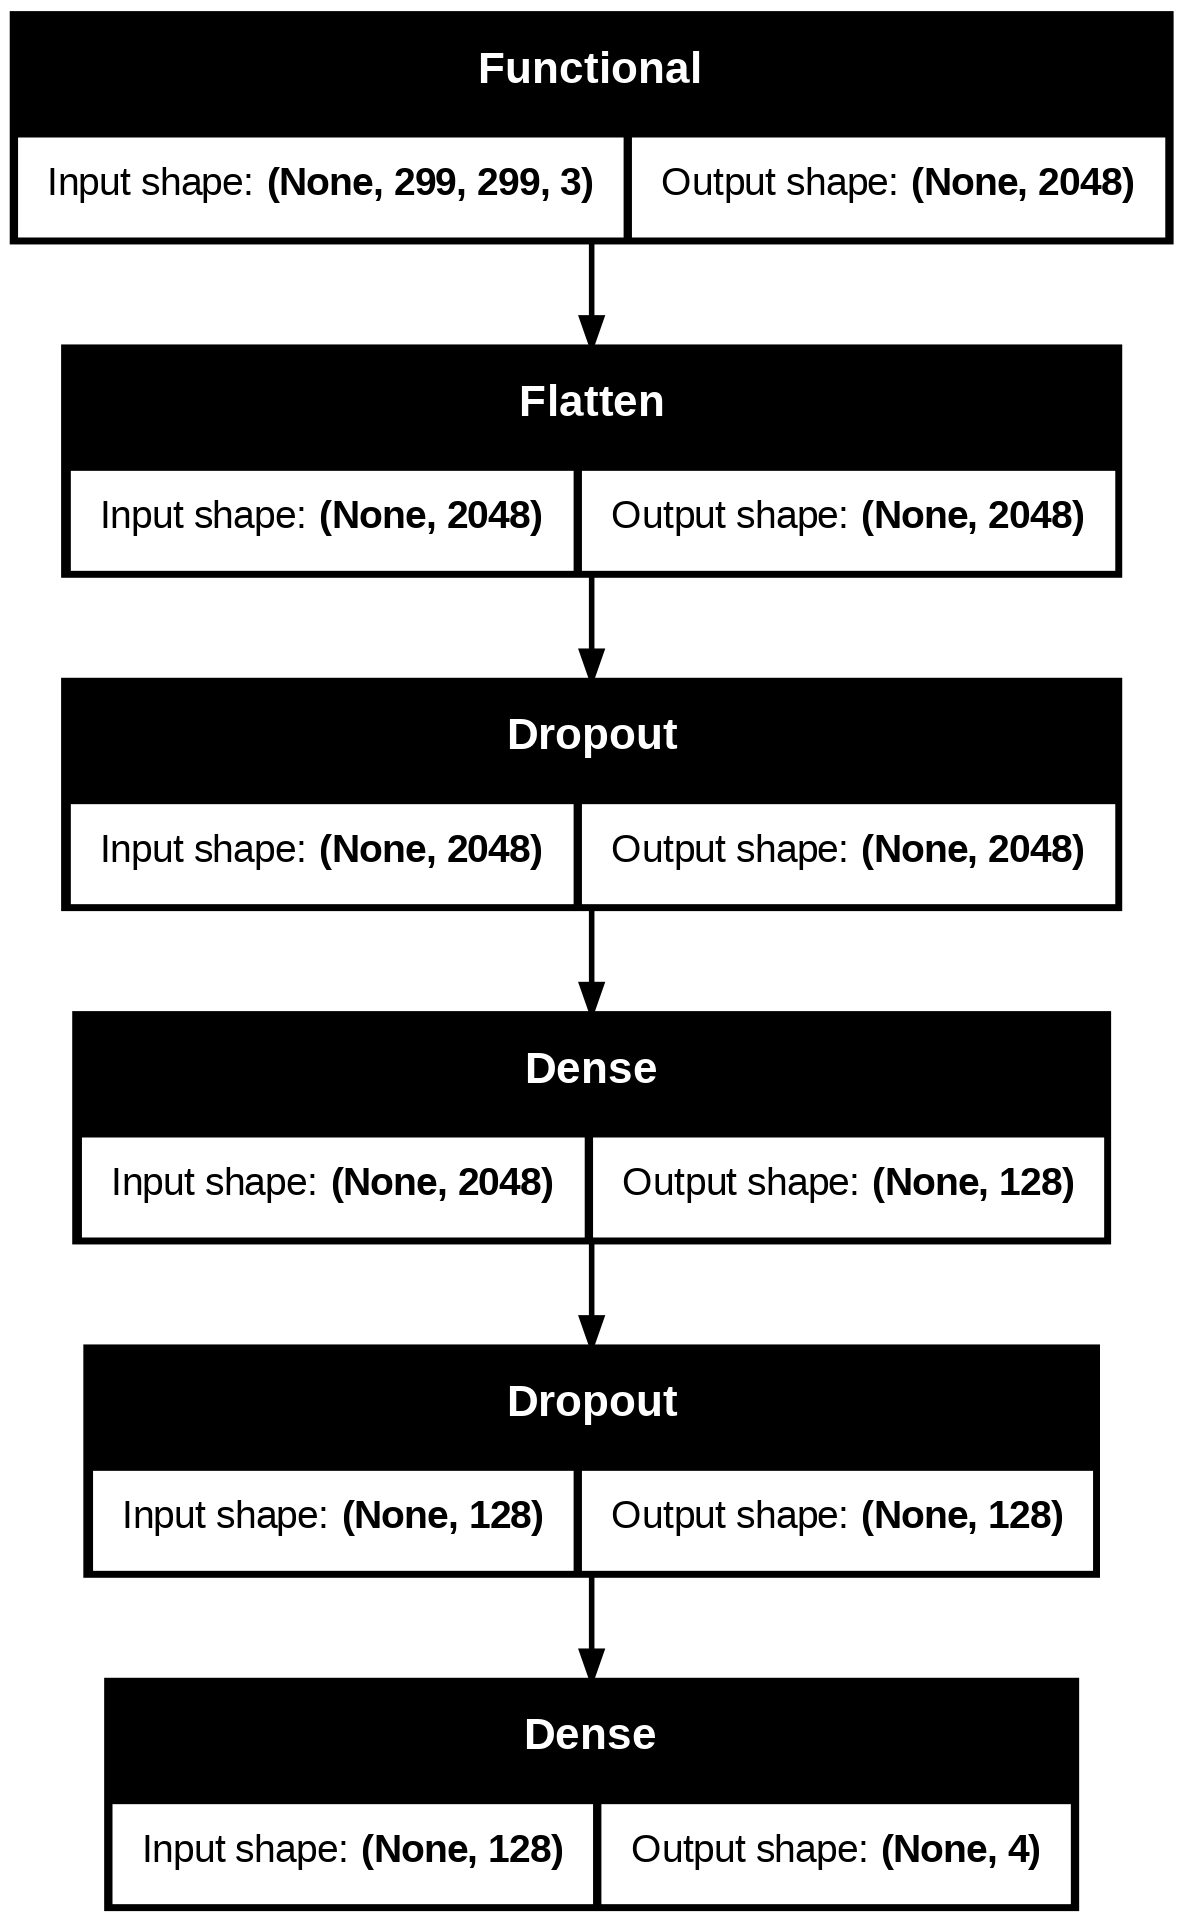

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True)      #Visualización de nuestra red neuronal

Entrenamiento

In [ ]:
hist = model.fit(tr_gen,                         #Función base para entrenar modelos (Recibe las tandas de fotos ya modificadas)
                 epochs=5,                      #Número de veces que se analizan las imágenes
                 validation_data=valid_gen,      #Cada epoch se valida la imagen para verificar si hay sobreacondicionamiento en el modelo
                 shuffle= False)                 #Ya tenemos un generador que hace shuffle (lo que ayuda a la CNN), así que no lo usaremos otra vez

Epoch 1/5
 42/179 ━━━━━━━━━━━━━━━━━━━━ 2:19:01 61s/step - accuracy: 0.6440 - loss: 1.0963 - precision: 0.7364 - recall: 0.5042

In [ ]:
hist.history.keys()     #Métricas del modelo

Visualización del rendimiento del modelo

In [ ]:
#Extraemos los datos históricos de entrenamiento
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

#Encontramos cuál es el epoch con mejor rendimiento
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

#Creamos loas etiquetas para los gráficos
Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Mejor epoch = {str(index_loss + 1)}'
acc_label = f'Mejor epoch = {str(index_acc + 1)}'
per_label = f'Mejor epoch = {str(index_precision + 1)}'
recall_label = f'Mejor epoch = {str(index_recall + 1)}'

#Plot de 4 gráficas
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

#Curva de pérdidas (Pérdida de entrenamiento en decadencia es buena señal)
plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Pérdida de Entrenamiento')
plt.plot(Epochs, val_loss, 'g', label='Pérdida de Validación')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

#Curva de precisión
plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Precisión de Entrenamiento')
plt.plot(Epochs, val_acc, 'g', label='Precisión de Validación')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

#Curva de precisión (Esta es la que necesitamos muy alta para grado médico)
plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precisión')
plt.plot(Epochs, val_per, 'g', label='Precisión de Validación')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precisión y Precisión de Validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

#Curva de Recuperación (Recal) - Indica que ten bueno es el modelos para reconocer tumores (No queremos falsos negativos!)
plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recuperación (Recall)')
plt.plot(Epochs, val_recall, 'g', label='Recuperación de Validación')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recuperación y Recuperación de Validación')
plt.xlabel('Epochs')
plt.ylabel('Recuperación (Recall)')
plt.legend()
plt.grid(True)

plt.suptitle('Métricas de entrenamiento de modelos a lo largo de Epochs', fontsize=16)
plt.show()

Evaluación

In [ ]:
#Evaluamos las métricas de los diferentes sets
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Pérdida de Entrenamiento: {train_score[0]:.4f}")
print(f"Precisión de Entrenamiento: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Pérdida de Validación: {valid_score[0]:.4f}")
print(f"Precisión de Validación: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Pérdida de Prueba: {test_score[0]:.4f}")
print(f"Precisión de Prueba: {test_score[1]*100:.2f}%")

In [ ]:
#Hace predicciones por cada clase
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

In [ ]:
#visualizamos la matriz de confusión por valores
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción de Clase')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión por Valores')
plt.show()

#visualizamos la matriz de confusión por porcentajes
cm = confusion_matrix(ts_gen.classes, y_pred, normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels, fmt=".2f")
plt.xlabel('Predicción de Clase')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión Normalizada')
plt.show()

Reporte de Clasificación

In [ ]:
#Reporte de las clasificación
clr = classification_report(ts_gen.classes, y_pred, target_names=labels)
print(clr)

In [ ]:
#Para guardar el reporte como un dataframe:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(ts_gen.classes, y_pred, target_names=labels, output_dict=True)
df_report = pd.DataFrame(report)
df_report

Pruebas

In [ ]:
#Creamos la función predict para generar un gráfico que nos muestre la predicción para la imagen que le mostremos
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image

    label = list(class_dict.keys())

    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

In [ ]:
model.save("Modelo_detector_de_tumores.h5")

In [ ]:
predict('/content/drive/MyDrive/Campistas G571 - Inteligencia Artificial - IUE/Proyecto NeuroDetect/Dataset/Testing/meningioma/Te-meTr_0000.jpg')

In [ ]:
predict('/content/drive/MyDrive/Campistas G571 - Inteligencia Artificial - IUE/Proyecto NeuroDetect/Dataset/Testing/glioma/Te-glTr_0007.jpg')

In [ ]:
predict('/content/drive/MyDrive/Campistas G571 - Inteligencia Artificial - IUE/Proyecto NeuroDetect/Dataset/Testing/notumor/Te-noTr_0001.jpg')

In [ ]:
predict('/content/drive/MyDrive/Campistas G571 - Inteligencia Artificial - IUE/Proyecto NeuroDetect/Dataset/Testing/pituitary/Te-piTr_0001.jpg')

In [ ]:
%%writefile app.py
import streamlit as st

st.set_page_config(layout="wide", page_title="NeuroDetect")

st.write("## Detecta e identifica tumores cerebrales")
st.write(
    "Sube la imágen del MRI que deseas evaluar"
)
st.sidebar.write("## Subida de imágenes")

# Increased file size limit
MAX_FILE_SIZE = 10 * 1024 * 1024  # 10MB
# Max dimensions for processing
MAX_IMAGE_SIZE = 2000  # pixels

# Resize image while maintaining aspect ratio
def resize_image(image, max_size):
    width, height = image.size
    if width <= max_size and height <= max_size:
        return image

    if width > height:
        new_width = max_size
        new_height = int(height * (max_size / width))
    else:
        new_height = max_size
        new_width = int(width * (max_size / height))

    return image.resize((new_width, new_height), Image.LANCZOS)



# UI Layout
col1, col2 = st.columns(2)
my_upload = st.sidebar.file_uploader("Upload an image", type=["png", "jpg", "jpeg"])

# Information about limitations
with st.sidebar.expander("ℹ Guía para las Imágenes"):
    st.write("""
    - Maximum file size: 10MB
    - Large images will be automatically resized
    - Supported formats: PNG, JPG, JPEG
    """)

# Process the image
if my_upload is not None:
    if my_upload.size > MAX_FILE_SIZE:
        st.error(f"The uploaded file is too large. Please upload an image smaller than {MAX_FILE_SIZE/1024/1024:.1f}MB.")
    else:
        predict(my_upload)
else:
        st.info("Please upload an image to get started!")



In [ ]:
#!npm install localtunnel
#import urllib
#print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

!pip install streamlit -q
!pip install pyngrok
!streamlit run app.py &>/content/logs.txt &
from pyngrok import ngrok

# Set authentication token if you haven't already done so
ngrok.set_auth_token("36jWUt5Yr2vgvI3GkEeX26FYCQl_282ZsGWDY7MeFLujLBy4G")

# Start Streamlit server on a specific port
!nohup streamlit run app.py --server.port 5011 &

#!npx localtunnel --port 8501
# Start ngrok tunnel to expose the Streamlit server
ngrok_tunnel = ngrok.connect(addr='5011', proto='http', bind_tls=True)
# Print the URL of the ngrok tunnel
print(' * Tunnel URL:', ngrok_tunnel.public_url)